In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
warnings.filterwarnings("ignore")

<h3> Import Data </h3>

In [2]:
originalData = pd.read_csv('/Users/zhen/Desktop/cancer1.csv')
dataset = originalData.copy()

In [3]:
dataset

,A,Gender,Age,Target,Albumin,Albumin/Globulin,Leukocyte,Alanine Aminotransferase (ALT),Percentage of Monocyte,Absolute of Monocyte,...,Aspartate Transaminase (AST),Hemoglobin,Platelet,Platelet Volume Distribution Width,Plateletcrit,Percentage of Neutrophil,Absolute of Neutrophil,Total Protein,AST/ALT,γ-Glutamyl Transpeptidase
0,0,F,68.0,1,41.3,1.16,11.190,21.10,4.90,0.55,...,30.30,141.0,264.0,12.1,0.28,76.2,8.52,77.00,1.44,26.100000
1,1,M,70.0,1,44.1,1.49,24.500,11.10,4.00,0.24,...,24.80,119.0,276.0,9.4,0.25,73.0,4.38,73.70,2.23,28.400000
2,2,F,53.0,1,31.3,0.78,6.210,30.00,8.50,0.53,...,15.00,109.0,169.0,7.9,0.13,55.6,3.45,71.40,0.50,49.226151
3,3,F,38.0,1,36.7,1.01,2.080,40.00,16.81,0.35,...,24.00,131.0,290.0,9.8,0.27,68.3,1.42,72.90,0.60,49.226151
4,4,F,41.0,1,41.8,1.55,8.170,58.10,7.00,0.57,...,41.10,138.0,241.0,12.3,0.26,71.0,5.80,68.70,0.71,124.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6350,6350,F,59.0,5,35.2,0.92,5.860,18.70,12.10,1.88,...,15.85,122.0,382.0,10.6,0.39,76.8,11.98,74.05,0.90,35.000000
6351,6351,F,63.0,5,39.5,1.52,2.650,20.25,17.00,0.90,...,20.65,142.0,237.0,14.3,0.29,45.4,2.41,65.85,1.15,11.000000
6352,6352,F,7.0,5,40.4,1.62,4.045,6.20,7.00,0.43,...,17.70,114.0,281.0,9.9,0.26,57.2,3.50,65.40,2.90,11.000000
6353,6353,M,56.0,5,34.8,1.00,8.545,4.10,7.70,0.35,...,10.70,117.0,196.0,13.4,0.23,66.2,3.01,68.60,2.60,9.000000


<h3>Data Clean</h3>

In [4]:
#drop unneed column
dataset.drop(['A'],axis=1,inplace=True)

In [5]:
#encode gender
dataset['Gender'][dataset['Gender']=='F']=0
dataset['Gender'][dataset['Gender']=='M']=1

In [6]:
dataset.head()

,Gender,Age,Target,Albumin,Albumin/Globulin,Leukocyte,Alanine Aminotransferase (ALT),Percentage of Monocyte,Absolute of Monocyte,Red Blood Cell,...,Aspartate Transaminase (AST),Hemoglobin,Platelet,Platelet Volume Distribution Width,Plateletcrit,Percentage of Neutrophil,Absolute of Neutrophil,Total Protein,AST/ALT,γ-Glutamyl Transpeptidase
0,0,68.0,1,41.3,1.16,11.19,21.1,4.90,0.55,4.76,...,30.3,141.0,264.0,12.1,0.28,76.2,8.52,77.0,1.44,26.100000
1,1,70.0,1,44.1,1.49,24.50,11.1,4.00,0.24,1.95,...,24.8,119.0,276.0,9.4,0.25,73.0,4.38,73.7,2.23,28.400000
2,0,53.0,1,31.3,0.78,6.21,30.0,8.50,0.53,3.41,...,15.0,109.0,169.0,7.9,0.13,55.6,3.45,71.4,0.50,49.226151
3,0,38.0,1,36.7,1.01,2.08,40.0,16.81,0.35,4.43,...,24.0,131.0,290.0,9.8,0.27,68.3,1.42,72.9,0.60,49.226151
4,0,41.0,1,41.8,1.55,8.17,58.1,7.00,0.57,4.42,...,41.1,138.0,241.0,12.3,0.26,71.0,5.80,68.7,0.71,124.500000


Text(0.5, 1.0, 'healty VS pneumonia VS lung cancer')

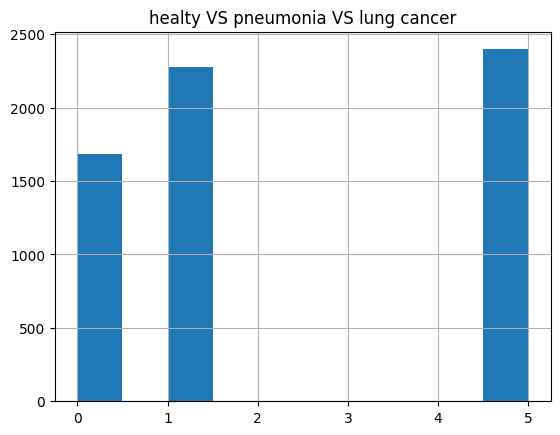

In [7]:
dataset['Target'].hist()
plt.title("healty VS pneumonia VS lung cancer")

In [8]:
# the fist model, predicting healthy people and people with lung disease, so here we make pneumonia and lung cancer into one type
dataset['Target'][dataset['Target']==5]=1

before : Target = 0 -- healthy ｜ Target = 1 -- pneumonia ｜ Target = 5 -- lung cancer

After : Target = 0 -- healthy ｜ Target = 1 unhealthy

Beside, here we can see the number of people who have lung cancer > who have pneumonia > healthy

It's impossible, so we can ensure that this is an imbalanced Data.

<h4>Gender exploit</h4>

In [9]:
print(originalData.groupby(["Gender","Target"])['Age'].count())
print(originalData.groupby(["Gender"])['Age'].count())

Gender  Target
F       0          714
        1         1491
        5         1440
M       0          971
        1          782
        5          957
Name: Age, dtype: int64
Gender
F    3645
M    2710
Name: Age, dtype: int64


<h4>Age exploit</h4>

Text(0.5, 1.0, 'Age distribution')

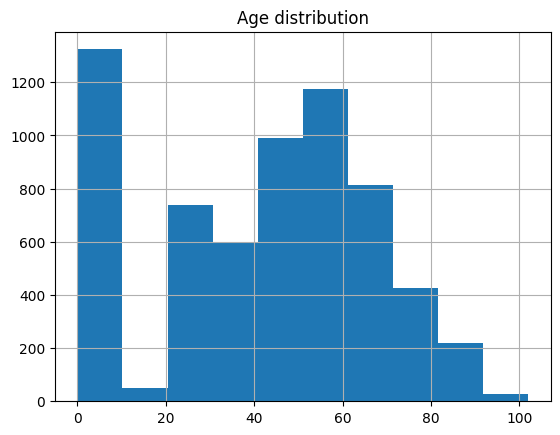

In [51]:
dataset['Age'].hist()
plt.title("Age distribution")

In [11]:
dataset.groupby('Target')['Age'].count()

Target
0    1685
1    4670
Name: Age, dtype: int64

In [12]:
AgeLower10 = dataset[dataset["Age"] <= 10]
AgeLower10.groupby(["Target"])["Age"].count()

Target
1    1324
Name: Age, dtype: int64

Data is strange, first We found that the samples were collected unevenly, and the proportion of samples under the age of 10 was too large

Also, that group are all unhealthy.

In [48]:
maxAge = max(dataset['Age'])
# Divide the ages into the following ranges:
# 10-20, 20-30, 30-40, 40-50, 50-60, 60-70, 70-80, 80-90, 90-100, 100-110
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
ageDividedLabel = ['0-10','10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-110']
dataset['AgeDivide'] = pd.cut(dataset['Age'], bins, labels=ageDividedLabel)
dataset.head()

,Gender,Age,Target,Albumin,Albumin/Globulin,Leukocyte,Alanine Aminotransferase (ALT),Percentage of Monocyte,Absolute of Monocyte,Red Blood Cell,...,Hemoglobin,Platelet,Platelet Volume Distribution Width,Plateletcrit,Percentage of Neutrophil,Absolute of Neutrophil,Total Protein,AST/ALT,γ-Glutamyl Transpeptidase,AgeDivide
0,0,68.0,1,41.3,1.16,11.19,21.1,4.90,0.55,4.76,...,141.0,264.0,12.1,0.28,76.2,8.52,77.0,1.44,26.100000,60-70
1,1,70.0,1,44.1,1.49,24.50,11.1,4.00,0.24,1.95,...,119.0,276.0,9.4,0.25,73.0,4.38,73.7,2.23,28.400000,60-70
2,0,53.0,1,31.3,0.78,6.21,30.0,8.50,0.53,3.41,...,109.0,169.0,7.9,0.13,55.6,3.45,71.4,0.50,49.226151,50-60
3,0,38.0,1,36.7,1.01,2.08,40.0,16.81,0.35,4.43,...,131.0,290.0,9.8,0.27,68.3,1.42,72.9,0.60,49.226151,30-40
4,0,41.0,1,41.8,1.55,8.17,58.1,7.00,0.57,4.42,...,138.0,241.0,12.3,0.26,71.0,5.80,68.7,0.71,124.500000,40-50


In [49]:
def getPercentage(df, count):
    result = []
    k = 0
    for record in df:
        result.append(record / count[k])
        k = k + 1
    return result

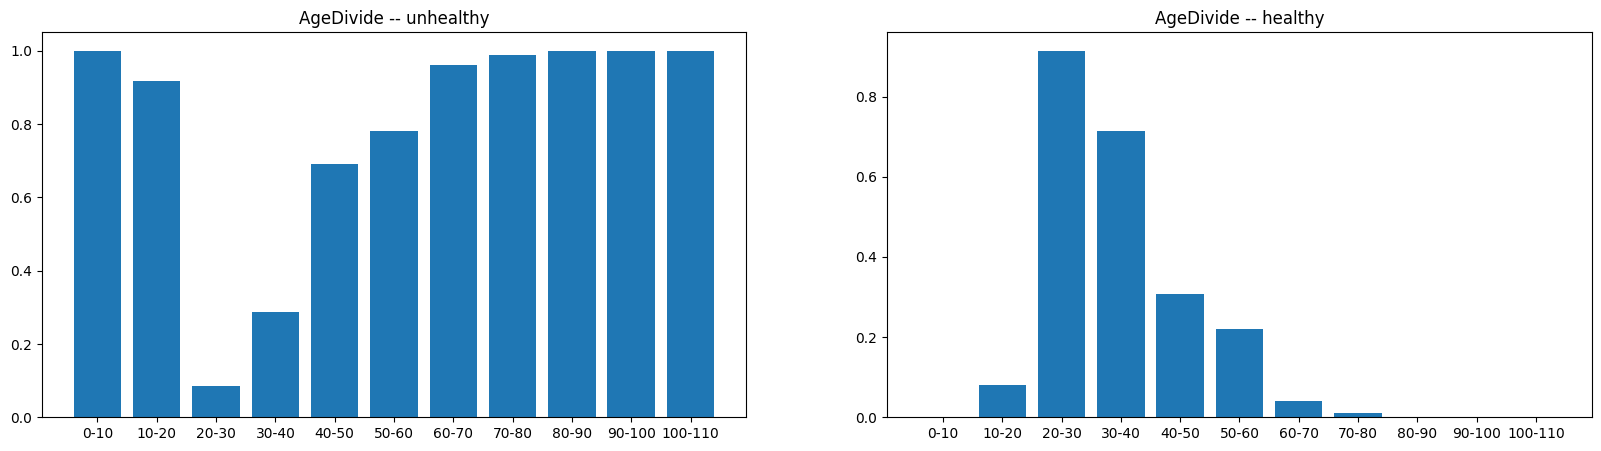

In [50]:
healthyAge = dataset[dataset['Target'] == 1]
unhealthyAge = dataset[dataset['Target'] == 0]
#total number of people in different age level
AgeStatic =  dataset.groupby(['AgeDivide'])['Gender'].count()
# the number of people in defferent age level is healthy
draw1 = healthyAge.groupby(['AgeDivide'])['Gender'].count()
# the number of people in defferent age level is unhealthy
draw2 = unhealthyAge.groupby(['AgeDivide'])['Gender'].count()
# caculate percentage = number of people in that age is (un)healthy / total number in that age level
healthyAgePercentage = getPercentage(draw1, AgeStatic)
unhealthyAgePercentage = getPercentage(draw2, AgeStatic)
plt.figure(figsize = (20,5))
plt.subplot(1, 2, 1)
plt.bar(ageDividedLabel, healthyAgePercentage)
plt.title("AgeDivide -- unhealthy")
plt.subplot(1, 2, 2)
plt.bar(ageDividedLabel, unhealthyAgePercentage)
plt.title("AgeDivide -- healthy")

plt.show()


Here we cannot get conclusion about age and lung disease, because the unevenly sampling. 

Therefore, I think we should not use age as one of the predictors. 

In [16]:
#dataset2 = dataset[dataset["Age"] > 10]
#dataset2

<h3> Fit Logit Regression model </h3>

In [17]:
y = dataset['Target']
x = dataset.drop(['Target','Gender','AgeDivide','Age'], axis=1)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [18]:
model_no_indicators = sm.Logit(y_train, x_train)
result_no_indicators = model_no_indicators.fit()
print(result_no_indicators.summary())

Optimization terminated successfully.
         Current function value: 0.058049
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 5084
Model:                          Logit   Df Residuals:                     5045
Method:                           MLE   Df Model:                           38
Date:                Wed, 14 Dec 2022   Pseudo R-squ.:                  0.8993
Time:                        18:10:12   Log-Likelihood:                -295.12
converged:                       True   LL-Null:                       -2931.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Albumin                                  

<h4> caculate corr of x </h4>

<AxesSubplot:>

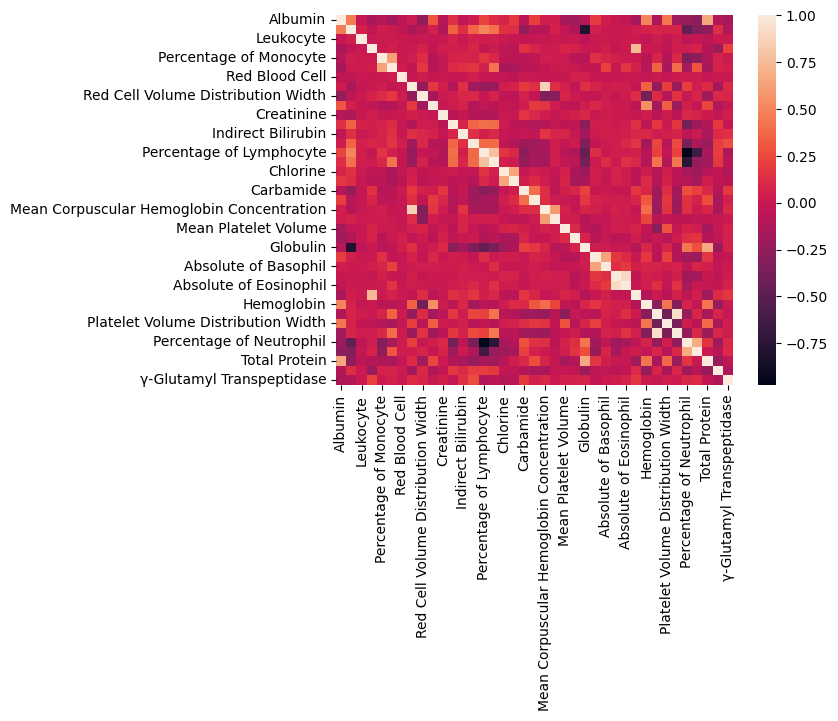

In [19]:
sns.heatmap(x.corr())

<h4> caculate VIF of x </h4>

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Use variance inflation factor to identify any significant multi-collinearity
def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

calc_vif(x).sort_values(by=['VIF'],ascending=False)

,variables,VIF
20,Mean Corpuscular Hemoglobin Concentration,8642.790660
7,Mean Corpuscular Volume,8225.644379
21,Mean Corpuscular Hemoglobin Concentration.1,7657.037897
17,Sodium,4977.403361
16,Chlorine,2457.879933
36,Total Protein,1898.377027
34,Percentage of Neutrophil,1437.148293
0,Albumin,796.643291
14,Percentage of Lymphocyte,567.500504
24,Globulin,477.175753


VIF too high!

<h3>Factor analysis</h3>

In [21]:
from factor_analyzer import FactorAnalyzer
from sklearn.datasets import load_breast_cancer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [22]:
kmo_all, kmo_model = calculate_kmo(x)
kmo_all,kmo_model

(array([0.55623883, 0.89900117, 0.86195982, 0.49050356, 0.34756614,
        0.49155917, 0.54925294, 0.41718401, 0.73569398, 0.79067358,
        0.83623644, 0.92937711, 0.76351681, 0.84934754, 0.69267473,
        0.79458404, 0.61902614, 0.5921648 , 0.8183961 , 0.83247123,
        0.453482  , 0.20944042, 0.22954781, 0.87787429, 0.60241628,
        0.57159764, 0.51722957, 0.44592105, 0.56391127, 0.52222531,
        0.85161074, 0.59237765, 0.80613241, 0.5990097 , 0.69348456,
        0.72446921, 0.53852472, 0.64055386, 0.64604931]),
 0.6062460053243123)

In [23]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(x)
ev, v = fa.get_eigenvalues()
ev

array([5.45340448e+00, 3.88760082e+00, 2.51345933e+00, 2.28771754e+00,
       1.97661498e+00, 1.95465176e+00, 1.57852540e+00, 1.49865470e+00,
       1.40134533e+00, 1.30476616e+00, 1.12511129e+00, 1.10033094e+00,
       1.08473255e+00, 1.00948663e+00, 9.87068702e-01, 9.69572672e-01,
       9.00610678e-01, 8.53662209e-01, 8.28147472e-01, 7.98418047e-01,
       7.45741955e-01, 6.68028767e-01, 6.37880705e-01, 6.07236287e-01,
       5.24674825e-01, 4.47629882e-01, 3.95605068e-01, 3.31572808e-01,
       2.90307109e-01, 2.50237511e-01, 1.83964120e-01, 1.26421486e-01,
       1.11711831e-01, 5.88613444e-02, 5.17746515e-02, 2.95586620e-02,
       1.94878531e-02, 4.39904985e-03, 1.02440212e-03])

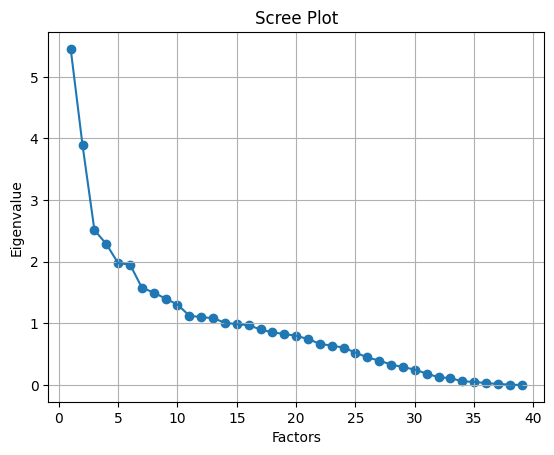

In [24]:
# Create scree plot using matplotlib
plt.scatter(range(1,x.shape[1]+1),ev)
plt.plot(range(1,x.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

<h4> Create factor loading table</h4>

In [25]:
fa = FactorAnalyzer()
fa.fit(x)
eigen_values, vectors = fa.get_eigenvalues()
fa = FactorAnalyzer()
# use scree plot to chose how many factors to generate -- 14 [eigenvalue > 1]
fa.set_params(n_factors=14, rotation='varimax')
fa.fit(x)
loadings = fa.loadings_

In [26]:
loadings=pd.DataFrame(abs(loadings))
loadings

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.186010,0.847078,0.041898,0.028282,0.067926,0.040305,0.102593,0.179407,0.037108,0.027394,0.123258,0.068300,0.218315,0.036361
1,0.352190,0.289175,0.053509,0.689498,0.023158,0.021607,0.006280,0.163790,0.001246,0.010057,0.220736,0.042939,0.073936,0.098921
2,0.036588,0.027227,0.001464,0.050212,0.002923,0.004801,0.006214,0.004396,0.000359,0.005581,0.031086,0.005911,0.018447,0.031173
3,0.026656,0.004928,0.018397,0.025113,0.027248,0.005194,1.004087,0.025599,0.016563,0.018657,0.045689,0.001133,0.050667,0.058148
4,0.126125,0.094994,0.021159,0.022784,0.002243,0.010460,0.006318,0.015581,0.920117,0.072092,0.044052,0.098781,0.012575,0.014754
5,0.133640,0.087337,0.001459,0.033258,0.271015,0.042314,0.014570,0.115950,0.706220,0.088388,0.001964,0.608544,0.057382,0.082266
6,0.004671,0.048272,0.012449,0.030018,0.000193,0.009017,0.010405,0.060207,0.003958,0.005176,0.010953,0.010903,0.002194,0.026466
7,0.185694,0.125158,0.677834,0.079116,0.041923,0.000439,0.051704,0.066732,0.074330,0.052249,0.207021,0.097197,0.132540,0.156315
8,0.004535,0.257744,0.378840,0.018623,0.063289,0.003905,0.034655,0.039166,0.128143,0.028515,0.113690,0.017171,0.121017,0.187391
9,0.024096,0.468847,0.141943,0.042720,0.067331,0.004881,0.025118,0.066940,0.057835,0.045129,0.100750,0.005463,0.064681,0.052652


In [27]:
listA = np.array(loadings).argmax(axis=0)
listA = list(listA)
print(listA)

[14, 0, 20, 24, 31, 27, 3, 17, 4, 25, 18, 35, 22, 13]


In [28]:
loadings["index"]=x.columns.tolist()
loadings

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,index
0,0.186010,0.847078,0.041898,0.028282,0.067926,0.040305,0.102593,0.179407,0.037108,0.027394,0.123258,0.068300,0.218315,0.036361,Albumin
1,0.352190,0.289175,0.053509,0.689498,0.023158,0.021607,0.006280,0.163790,0.001246,0.010057,0.220736,0.042939,0.073936,0.098921,Albumin/Globulin
2,0.036588,0.027227,0.001464,0.050212,0.002923,0.004801,0.006214,0.004396,0.000359,0.005581,0.031086,0.005911,0.018447,0.031173,Leukocyte
3,0.026656,0.004928,0.018397,0.025113,0.027248,0.005194,1.004087,0.025599,0.016563,0.018657,0.045689,0.001133,0.050667,0.058148,Alanine Aminotransferase (ALT)
4,0.126125,0.094994,0.021159,0.022784,0.002243,0.010460,0.006318,0.015581,0.920117,0.072092,0.044052,0.098781,0.012575,0.014754,Percentage of Monocyte
5,0.133640,0.087337,0.001459,0.033258,0.271015,0.042314,0.014570,0.115950,0.706220,0.088388,0.001964,0.608544,0.057382,0.082266,Absolute of Monocyte
6,0.004671,0.048272,0.012449,0.030018,0.000193,0.009017,0.010405,0.060207,0.003958,0.005176,0.010953,0.010903,0.002194,0.026466,Red Blood Cell
7,0.185694,0.125158,0.677834,0.079116,0.041923,0.000439,0.051704,0.066732,0.074330,0.052249,0.207021,0.097197,0.132540,0.156315,Mean Corpuscular Volume
8,0.004535,0.257744,0.378840,0.018623,0.063289,0.003905,0.034655,0.039166,0.128143,0.028515,0.113690,0.017171,0.121017,0.187391,Red Cell Volume Distribution Width
9,0.024096,0.468847,0.141943,0.042720,0.067331,0.004881,0.025118,0.066940,0.057835,0.045129,0.100750,0.005463,0.064681,0.052652,Packed Cell Volume


In [29]:
newName2 = []
for i in listA:
    newName2.append(loadings['index'][i])
print(newName2)

['Percentage of Lymphocyte', 'Albumin', 'Mean Corpuscular Hemoglobin Concentration', 'Globulin', 'Platelet', 'Percentage of Eosinophil', 'Alanine Aminotransferase (ALT)', 'Sodium', 'Percentage of Monocyte', 'Percentage of Basophil', 'Carbamide', 'Absolute of Neutrophil', 'Mean Platelet Volume', 'Alkaline Phosphatase']


In [30]:
# add this feature back, because after google, we find it has relattionship with the outcome 
newName2.append('Platelet Volume Distribution Width')

In [31]:
newX = x[newName2]

In [32]:
calc_vif(newX).sort_values(by=['VIF'],ascending=False)

,variables,VIF
7,Sodium,416.695815
2,Mean Corpuscular Hemoglobin Concentration,137.708571
12,Mean Platelet Volume,112.436891
1,Albumin,83.412658
14,Platelet Volume Distribution Width,42.959143
3,Globulin,35.473227
0,Percentage of Lymphocyte,13.926023
4,Platelet,12.535182
8,Percentage of Monocyte,9.755467
11,Absolute of Neutrophil,8.507523


In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(newX, y, test_size= 0.2, random_state= 0)

# P value

In [34]:
x_train=pd.DataFrame(x_train)

In [35]:
x_train

,Percentage of Lymphocyte,Albumin,Mean Corpuscular Hemoglobin Concentration,Globulin,Platelet,Percentage of Eosinophil,Alanine Aminotransferase (ALT),Sodium,Percentage of Monocyte,Percentage of Basophil,Carbamide,Absolute of Neutrophil,Mean Platelet Volume,Alkaline Phosphatase,Platelet Volume Distribution Width
4979,32.922767,40.6,29.439893,22.1,257.300512,2.273533,13.6,136.900000,7.041994,0.366979,2.250000,4.455327,10.084026,139.10000,13.186014
584,33.400000,41.6,31.200000,31.0,160.000000,7.900000,35.0,138.900000,4.800000,0.600000,4.377987,3.300000,12.800000,121.02407,18.500000
3365,25.500000,51.1,29.000000,33.8,272.000000,5.000000,12.3,139.938998,5.100000,0.000000,5.490000,4.750000,10.100000,121.02407,11.400000
476,20.400000,42.5,32.700000,28.5,160.000000,12.500000,48.5,138.900000,5.400000,0.500000,3.530000,5.900000,12.200000,110.80000,15.500000
3976,76.600000,45.8,27.100000,21.9,220.000000,2.000000,20.4,140.900000,4.340000,0.240000,2.790000,0.870000,10.200000,218.00000,11.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,11.200000,32.5,30.100000,33.9,319.000000,1.000000,56.4,140.000000,5.600000,0.000000,4.260000,10.270000,8.600000,77.40000,8.300000
3264,29.500000,42.3,30.100000,37.6,307.000000,1.100000,16.5,139.938998,5.800000,0.500000,5.200000,5.010000,9.200000,121.02407,16.900000
1653,23.000000,41.3,29.300000,34.2,529.000000,7.200000,39.5,133.800000,8.740000,0.240000,3.990000,9.190000,10.700000,304.60000,12.400000
2607,40.000000,41.7,31.000000,32.5,209.000000,1.400000,24.5,139.938998,9.610000,0.570000,2.880000,1.970000,8.670000,121.02407,16.200000


In [47]:
len(x_test) + len(x_train)

6355

In [36]:
y_train=y_train.reset_index()
x_train=x_train.reset_index()

In [37]:
y_train.drop(['index'],axis=1,inplace=True)
x_train.drop(['index'],axis=1,inplace=True)

In [38]:
model_no_indicators = sm.Logit(y_train,x_train)
result_no_indicators = model_no_indicators.fit()
print(result_no_indicators.summary())

Optimization terminated successfully.
         Current function value: 0.076799
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 5084
Model:                          Logit   Df Residuals:                     5069
Method:                           MLE   Df Model:                           14
Date:                Wed, 14 Dec 2022   Pseudo R-squ.:                  0.8668
Time:                        18:10:41   Log-Likelihood:                -390.45
converged:                       True   LL-Null:                       -2931.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Percentage of Lymphocyte                     

In [39]:
result_no_indicators.pvalues.sort_values()

Platelet Volume Distribution Width           2.495980e-90
Albumin                                      1.128972e-63
Mean Platelet Volume                         3.186128e-55
Sodium                                       4.622610e-29
Alanine Aminotransferase (ALT)               1.844387e-08
Globulin                                     1.754417e-07
Percentage of Basophil                       3.479456e-04
Percentage of Eosinophil                     7.890279e-03
Mean Corpuscular Hemoglobin Concentration    1.916084e-02
Percentage of Monocyte                       7.587492e-02
Absolute of Neutrophil                       8.158897e-02
Carbamide                                    1.869421e-01
Alkaline Phosphatase                         7.191297e-01
Percentage of Lymphocyte                     9.467618e-01
Platelet                                     9.686729e-01
dtype: float64

In [40]:
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (5084, 15)
Number transactions y_train dataset:  (5084, 1)
Number transactions x_test dataset:  (1271, 15)
Number transactions y_test dataset:  (1271,)


In [41]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

<h3> Test All models and use K-fold validation</h3>

In [44]:
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Gradiesnt Boost', GradientBoostingClassifier(random_state=0)])

lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

Logistic Regreesion :
[[332  14]
 [ 17 908]]
Accuracy Score:  0.975609756097561

K-Fold Validation Mean Accuracy: 97.21 %

Standard Deviation: 0.83 %

ROC AUC Score: 0.97

Precision: 0.98

Recall: 0.98

F1: 0.98
-----------------------------------

Decision Tree :
[[339   7]
 [ 13 912]]
Accuracy Score:  0.98426435877262

K-Fold Validation Mean Accuracy: 98.47 %

Standard Deviation: 0.41 %

ROC AUC Score: 0.98

Precision: 0.99

Recall: 0.99

F1: 0.99
-----------------------------------



KeyboardInterrupt: 

In [ ]:
#set parameters
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (GradientBoostingClassifier(),[{'n_estimators':[100,150,200],'criterion':['friedman_mse','mse'],'loss':['deviance','exponential'],'learning_rate':[0.1, 0.5, 0.8, 1],'random_state':[0]}]),]

In [ ]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(x_train, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

LogisticRegression():
Best Accuracy : 97.27%
Best Parameters :  {'C': 0.25, 'random_state': 0}

----------------

DecisionTreeClassifier():
Best Accuracy : 98.84%
Best Parameters :  {'criterion': 'entropy', 'random_state': 0}

----------------

GradientBoostingClassifier():
Best Accuracy : 99.59%
Best Parameters :  {'criterion': 'friedman_mse', 'learning_rate': 0.5, 'loss': 'deviance', 'n_estimators': 200, 'random_state': 0}

----------------



In [ ]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'f1',cv = 10)
    grid.fit(x_train, y_train)
    best_f1 = grid.best_score_
    best_param = grid.best_params_

    print('{}:\nBest f1 : {:.2f}%'.format(i,best_f1*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

LogisticRegression():
Best f1 : 98.16%
Best Parameters :  {'C': 0.25, 'random_state': 0}

----------------

DecisionTreeClassifier():
Best f1 : 99.21%
Best Parameters :  {'criterion': 'entropy', 'random_state': 0}

----------------

GradientBoostingClassifier():
Best f1 : 99.72%
Best Parameters :  {'criterion': 'friedman_mse', 'learning_rate': 0.5, 'loss': 'deviance', 'n_estimators': 200, 'random_state': 0}

----------------



              precision    recall  f1-score   support

           0       0.99      0.99      0.99       346
           1       1.00      1.00      1.00       925

    accuracy                           1.00      1271
   macro avg       1.00      0.99      1.00      1271
weighted avg       1.00      1.00      1.00      1271

ROC AUC score: 0.9999062646461491
Accuracy Score:  0.996066089693155


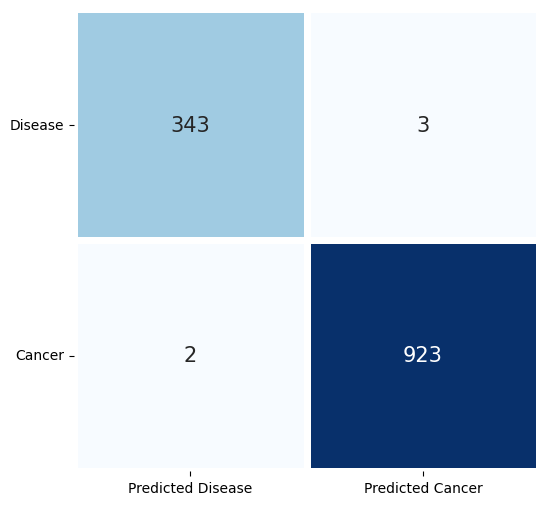

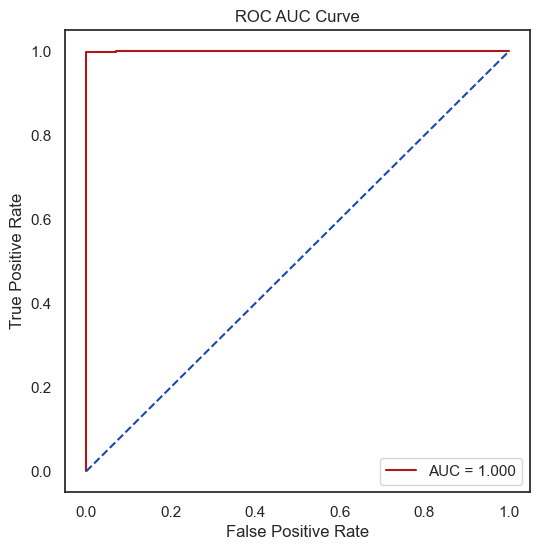

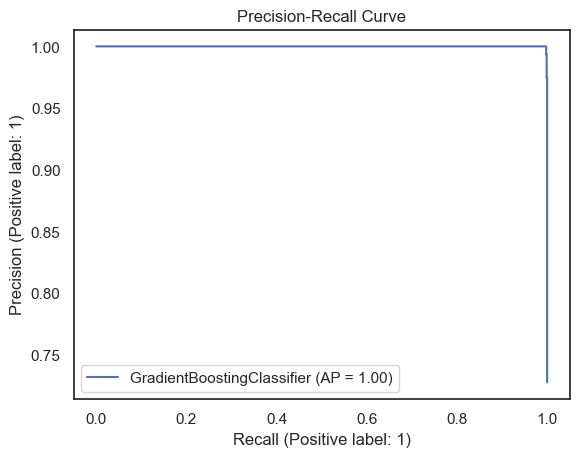

In [ ]:
#Fitting GradientBoostingClassifier Model
classifier = GradientBoostingClassifier(criterion= 'friedman_mse', learning_rate= 0.1, loss= 'exponential', n_estimators= 200, random_state= 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Disease', 'Cancer'], xticklabels = ['Predicted Disease', 'Predicted Cancer'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
classifier=classifier.fit(x_train, y_train)
classifier.feature_importances_
x_train=pd.DataFrame(x_train)
x_train.columns=newX.columns
pd.DataFrame(classifier.feature_importances_,x_train.columns,columns=['Importances']).sort_values(by=['Importances'],ascending=False)

,Importances
Platelet Volume Distribution Width,0.759419
Mean Platelet Volume,0.125682
Albumin,0.053415
Sodium,0.037357
Alkaline Phosphatase,0.012168
Percentage of Basophil,0.003783
Platelet,0.001795
Alanine Aminotransferase (ALT),0.001660
Absolute of Neutrophil,0.001355
Percentage of Lymphocyte,0.000950
